<a href="https://colab.research.google.com/github/AdelaideUniversityMathSciences/MathsForAI/blob/main/Code/audio_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import torch
import torch.fft as fft
import matplotlib.pyplot as plt
import math
from google.colab import files
from google.colab import drive
drive.mount('/drive')

# https://pytorch.org/tutorials/beginner/audio_preprocessing_tutorial.html
# https://stackoverflow.com/questions/61573928/using-ipython-display-audio-to-play-audio-in-jupyter-notebook-not-working-when-u
# https://musicinformationretrieval.com/ipython_audio.htmlfrom google.colab import drive
import torchaudio
import IPython.display as ipd
import requests



Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [20]:
git_url = "https://github.com/AdelaideUniversityMathSciences/MathsForAI/blob/main/Data/"
# audio_file = "cos_110.mp3"
# audio_file = "The_Dark_Side_Of_The_Moon_01.wav"
audio_file = "guitar_pluck.mp3"
suffix = "?raw=true"
audio_url = git_url + audio_file + suffix
audio_file = '/drive/My Drive/Data/guitar_pluck.mp3'
with open(audio_file, 'wb') as file_:
  file_.write( requests.get(audio_url).content )

ipd.Audio(audio_file)


44100
torch.Size([2, 134784])


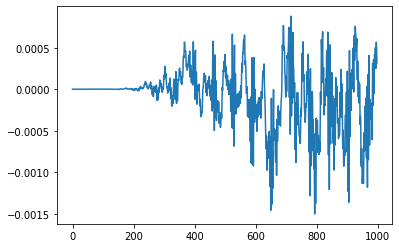

In [21]:
data_waveform, sample_rate = torchaudio.load(audio_file)
print(sample_rate)
print(data_waveform.size())
plt.plot(data_waveform[1,1:1000])


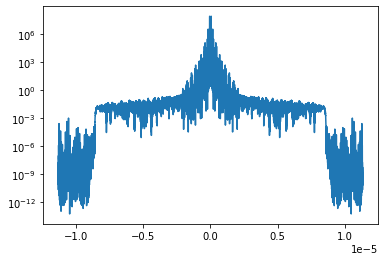

In [22]:
z = fft.fftshift(fft.fft( data_waveform[1,:] ))
f = fft.fftshift(fft.fftfreq( z.size(dim=0), d=sample_rate))
plt.semilogy( f, abs(z) ** 2 )
